# 画像メディア工学４回目
## 4. 領域に基づく濃淡変換
### ライブラリの読み込み（おまじない）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### 画像の読み込み
以下の画像をColabにアップロードします．

https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img02.png

In [2]:
!wget https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img02.png -O img02.png

## 4.1 Pythonの関数
まず，Pythonでの関数の定義などについて，簡単に紹介しておく．

使い方はＣ言語などと同じで，()の中に入力の引数を指定し戻り値が返る．

In [3]:
# 足し算を計算する関数の定義
def add_func(a,b):
    return a+b

# 実行
res1 = add_func(5,3)
print ("add:", res1)

add: 8


Pythonの関数では，複数個の戻り値を指定することもできる．

（ただし今回の課題では，複数の戻り値は使用しません）

In [4]:
# 足し算と引き算を計算する関数
def add_sub_func(a,b):
    return a+b, a-b

複数の戻り値を利用する場合には，以下のように変数をコンマで並べる．

In [5]:
res1, res2 = add_sub_func(5,3)
print ("add:", res1)
print ("sub:", res2)

add: 8
sub: 2


## 4.2 領域に基づく変換

### 画像の読み込み


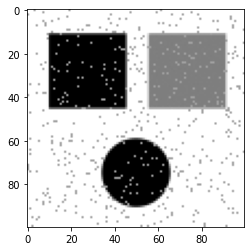

In [6]:
img = cv2.imread('img02.png', 0);  # モノクロ画像として読み込み
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

### 変換用の関数の定義
以下で利用する，サイズ３×３のフィルタを適用するための関数``filter_3x3``を定義する．

引数：画像 img, フィルタ filter

戻り値：変換後の画像

In [7]:
def filter_3x3(img, filter):    
    
    # h: 画像の高さ, w: 画像の幅
    h,w = img.shape
    
    # フィルタ処理後の画像の準備
    resimg = np.zeros((h,w))
    
    # 画像の端はスキップ
    for i in range(1,h-1):
        for j in range(1,w-1):
            
            # 画像（画素）とフィルタの積和計算
            val = 0
            for k in range(-1,2):
                for l in range(-1,2):
                    val += img[i+k,j+l] * filter[k+1,l+1]

            # 変換後画像に代入
            resimg[i,j] = val
    
    return resimg

フィルタの定義と関数の呼び出し（ここでは単純な平均化フィルタを定義）

コメントアウトされた行の``np.ones()``関数はすべてに1が代入された行列を作成する関数で，どちらの方法でも同じフィルタが定義できる．

``filter_3x3``関数を利用してフィルタを適用すると，その結果は``resimg``に代入される．

In [8]:
#filter = np.ones((3,3))/9
filter = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])/9
print(filter)

# 画像へのフィルタの適用
resimg = filter_3x3(img, filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


OpenCVには，同じ処理を行うためのcv2.filter2D関数が存在する．
演習ではなくプログラムを作成する際には，そちらを使った方が高速に実行できる．


In [9]:
# resimg = cv2.filter2D(img, -1, filter)

### 画像の表示
ここでは，入力と変換結果を横並びで描画するために，plt.subplot関数を使用している．

plt.subplot(1,2,1)は，描画領域を縦1行，横2列に分割し，1番目に描画せよ，という意味．

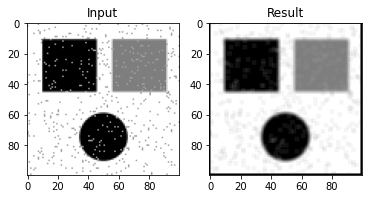

In [10]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.title("Input")
plt.subplot(1,2,2)
plt.imshow(resimg, cmap='gray', vmin = 0, vmax = 255)
plt.title("Result");

# 課題
以下のプログラムでは，ソーベルフィルタ（横方向）を適用した場合と，微分フィルタを適用した後に平滑化フィルタを適用した場合を比較しようとしています．

ソーベルフィルタ（横方向）の処理部分は完成していますので，それと同等の処理となる**微分フィルタ``filter1``, 平滑化フィルタ``filter2``を完成させ，それらの定義部分を提出してください**．これにより，ソーベルフィルタが微分と平滑化の組み合わせからなることが確認できるはずです．

また課題とはしませんが，フィルタの定義を色々と変更し，それらのフィルタでどのような結果が得られるかも確認してみてください．

（例えば，縦方向のソーベルフィルタを実現してみるなど）

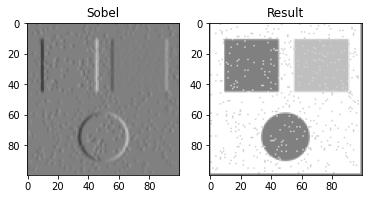

In [11]:
# ソーベルフィルタ（横方向）を定義し適用
sobelfilter = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])/8
resimg = filter_3x3(img, sobelfilter)

##### 提出部分　ここから
# 微分フィルタを定義してください
filter1 = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]])

# 平滑化フィルタを定義してください
filter2 = np.array([[0,0,0],
                    [0,1,0],                    
                    [0,0,0]])
##### ここまで

resimg1 = filter_3x3(img,     filter1) # まずimgに微分フィルタを適用
resimg2 = filter_3x3(resimg1, filter2) # 微分フィルタの結果に平滑化フィルタを適用

# 結果の表示（左にソーベルフィルタの結果，右に上で定義したフィルタの結果）
# 微分の結果は正とは限らないため，プロットの範囲を-255～255としている
plt.subplot(1,2,1)
plt.imshow(resimg, cmap='gray', vmin = -255, vmax = 255)
plt.title("Sobel")
plt.subplot(1,2,2)
plt.imshow(resimg2, cmap='gray', vmin = -255, vmax = 255)
plt.title("Result");